In [225]:
pip install pmdarima

In [226]:
import pandas as pd
import numpy as np

In [227]:
df=pd.read_excel('/content/Book1.xlsx',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df

Shape of data (127, 1)


,Price
Date,
2014-01-01,1968.29
2014-02-01,1975.00
2014-03-01,1930.00
2014-04-01,1946.88
2014-05-01,2058.75
...,...
2024-03-01,3406.61
2024-04-01,3355.77
2024-05-01,3390.33


<Axes: xlabel='Date'>

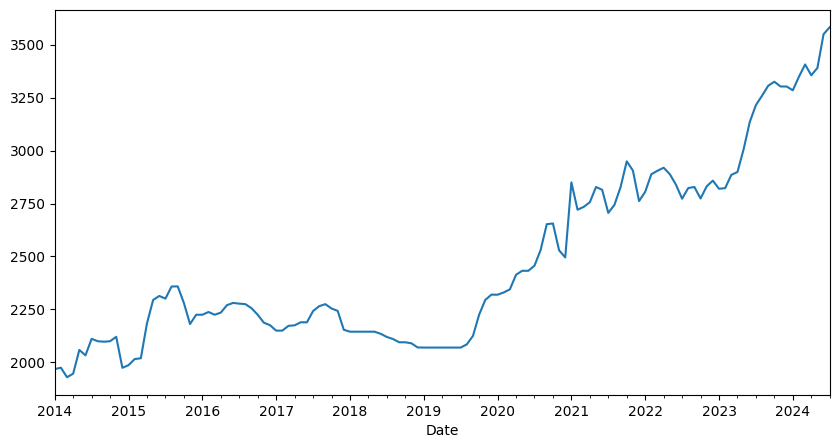

In [228]:
df['Price'].plot(figsize=(10,5))

In [229]:
from statsmodels.tsa.stattools import adfuller

In [230]:
test_result=adfuller(df['Price'])

In [231]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [232]:
adfuller_test(df['Price'])

ADF Test Statistic : 1.1302946791072233
p-value : 0.9954670599039567
#Lags Used : 2
Number of Observations Used : 124
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


ADF Test Statistic : -9.303323925991258
p-value : 1.0975111404592454e-15
#Lags Used : 1
Number of Observations Used : 124
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


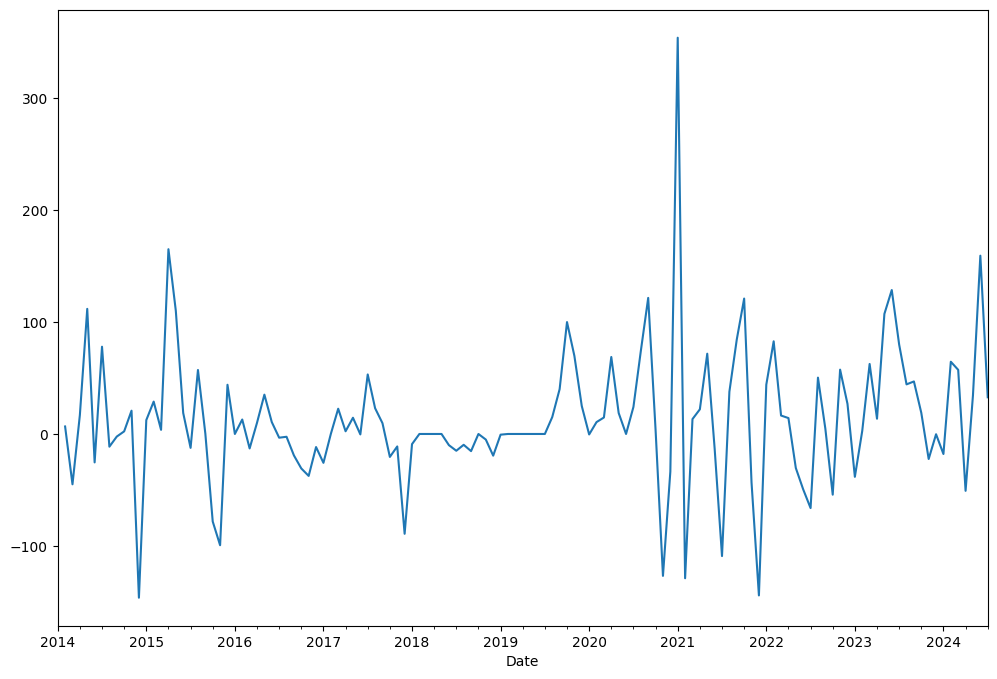

In [233]:
# prompt: convert above non-stationary data to stationary data

df['Price First Difference'] = df['Price'] - df['Price'].shift(1)
df['Price First Difference'].plot(figsize=(12,8))
adfuller_test(df['Price First Difference'].dropna())

In [234]:
!pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [235]:
model=sm.tsa.statespace.SARIMAX(df['Price'],order=(0, 1, 0),seasonal_order=(0,1,1,12))
results=model.fit()

In [236]:
predict_df=pd.read_excel('/content/Book2.xlsx',index_col='Date',parse_dates=True)


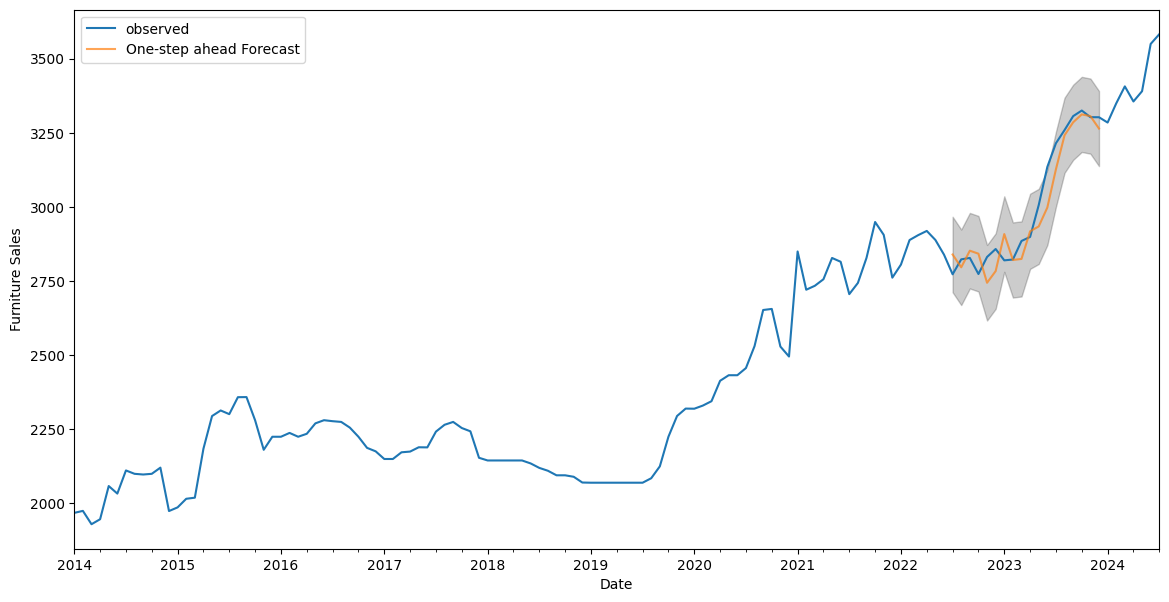

In [241]:
pred = results.get_prediction(start=pd.to_datetime('2022-07-01'), end=pd.to_datetime('2023-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['Price'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [242]:
# Extract predicted values
predicted_prices = pred.predicted_mean

# Convert to DataFrame for easier handling
predicted_df = predicted_prices.to_frame(name='Predicted Price')

# If you want to see the predicted prices:
print(predicted_df)

# To get a specific date's predicted price (replace '2023-07-01' with your desired date):
predicted_price_for_date = predicted_df.loc['2023-07-01', 'Predicted Price']
print(predicted_price_for_date)


            Predicted Price
2022-07-01      2839.613592
2022-08-01      2796.446562
2022-09-01      2852.476219
2022-10-01      2842.350503
2022-11-01      2744.286571
2022-12-01      2783.676743
2023-01-01      2908.555546
2023-02-01      2821.106086
2023-03-01      2824.738083
2023-04-01      2917.950733
2023-05-01      2934.339822
2023-06-01      2997.998887
2023-07-01      3127.253907
2023-08-01      3241.802326
2023-09-01      3285.508462
2023-10-01      3312.162832
2023-11-01      3306.369842
2023-12-01      3264.347733
3127.253907294372
